# Explore here

In [1]:
# Import
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import chi2, SelectKBest

In [2]:
# Get data
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")
# data.to_csv("../data/raw/data.csv", index=False)
data

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


In [3]:
# Tamaño de mis datos
data.shape

(3140, 108)

In [4]:
# Informacion general de mis datos
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 108 columns):
 #    Column                                                                         Dtype  
---   ------                                                                         -----  
 0    fips                                                                           int64  
 1    TOT_POP                                                                        int64  
 2    0-9                                                                            int64  
 3    0-9 y/o % of total pop                                                         float64
 4    19-Oct                                                                         int64  
 5    10-19 y/o % of total pop                                                       float64
 6    20-29                                                                          int64  
 7    20-29 y/o % of total pop                         

In [5]:
# Búsqueda de duplicados
# display(data[data.duplicated(keep=False)])

data = data.drop_duplicates()
data

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


In [6]:
# Selección de atributos relevantes

# Eliminacion de columna "fips" representativa de codigo asignado a cada condado
data = data.drop("fips", axis=1)

In [7]:
# Agrupacion de rangos de edades mas amplia en valores porcentuales respecto al "TOT_POP"
data["0-19 %"] = (data["0-9"] + data["19-Oct"])*100/data["TOT_POP"]
data["20-49 %"] = (data["20-29"] + data["30-39"] + data["40-49"])*100/data["TOT_POP"]
data["50+ %"] = (data["50-59"] + data["60-69"] + data["70-79"] + data["80+"])*100/data["TOT_POP"]

# Columnas con rango de edades a eliminar
cols_to_drop = data.columns[1:19]
data = data.drop(columns=cols_to_drop)

In [8]:
# Columnas con datos etnicos a eliminar, mantengo los datos porcentuales
cols_to_drop = ["White-alone pop", "Black-alone pop", "Native American/American Indian-alone pop", 
                "Asian-alone pop", "Hawaiian/Pacific Islander-alone pop", "Two or more races pop"]
data = data.drop(columns=cols_to_drop)

In [9]:
# Analisis de igualdad entre columna "TOT_POP" y "POP_ESTIMATE_2018"
equals = data["TOT_POP"] ==  data["POP_ESTIMATE_2018"]
display(equals.value_counts()) # Las columnas son exactamente iguales en sus datos, se procede a eliminar "POP_ESTIMATE_2018"
data = data.drop("POP_ESTIMATE_2018", axis=1)

True    3140
Name: count, dtype: int64

In [10]:
# Eliminacion de datos de nivel academico, mantengo los datos porcentuales
cols_to_drop = ["Less than a high school diploma 2014-18", "High school diploma only 2014-18", 
                "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18"]
data = data.drop(columns=cols_to_drop)

In [11]:
# Elimino rango de edades y mantengo los ya agrupados al inicio
cols_to_drop = ["Population Aged 60+", "Percent of Population Aged 60+"]
data = data.drop(columns=cols_to_drop)

In [12]:
# Eliminacion de datos de margen de error o incertidumbre y los datos totales en bruto, mantengo la prevalencia
cols_to_drop = ["anycondition_Lower 95% CI", "anycondition_Upper 95% CI", "anycondition_number", 
                "Obesity_Lower 95% CI", "Obesity_Upper 95% CI", "Obesity_number", 
                "Heart disease_Lower 95% CI", "Heart disease_Upper 95% CI", "Heart disease_number", 
                "COPD_Lower 95% CI", "COPD_Upper 95% CI", "COPD_number", 
                "diabetes_Lower 95% CI", "diabetes_Upper 95% CI", "diabetes_number", 
                "CKD_Lower 95% CI", "CKD_Upper 95% CI", "CKD_number"]
data = data.drop(columns=cols_to_drop)

In [13]:
# Eliminacion de datos que representan tasas porcentuales, grupos de edades diferentes a los agrupados y codigos de estado que no aportan
cols_to_drop = ["CI90LBINC_2018", "CI90UBINC_2018", "Unemployment_rate_2018", "STATE_FIPS", "county_pop2018_18 and older", 
                "Total Population", "COUNTY_NAME", "STATE_NAME", "CNTY_FIPS"]
data = data.drop(columns=cols_to_drop)

In [14]:
# Con la seleccion anterior de atributos relevantes reducimos el tamaño de nuestros datos en mas de la mitad
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 52 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   TOT_POP                                                                        3140 non-null   int64  
 1   % White-alone                                                                  3140 non-null   float64
 2   % Black-alone                                                                  3140 non-null   float64
 3   % NA/AI-alone                                                                  3140 non-null   float64
 4   % Asian-alone                                                                  3140 non-null   float64
 5   % Hawaiian/PI-alone                                                            3140 non-null   float64
 6   % Two or more races     

In [15]:
# Defino "Heart disease_prevalence" como mi variable a predecir, es de tipo continua y no presenta valores nulos ni faltantes
# El dataset es susceptible de sufrir mas cambios o eliminaciones a medida que avance el analisis

In [16]:
# ANALISIS DE VARIABLES CATEGORICAS >> "Urban_rural_code"
data.Urban_rural_code.value_counts()

Urban_rural_code
6    1333
5     641
3     372
2     368
4     358
1      68
Name: count, dtype: int64

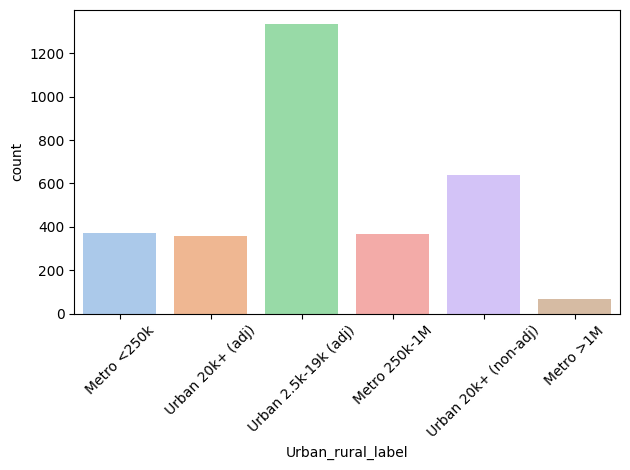

In [17]:
urban_rural_labels = {
    1: "Metro >1M",
    2: "Metro 250k-1M",
    3: "Metro <250k",
    4: "Urban 20k+ (adj)",
    5: "Urban 20k+ (non-adj)",
    6: "Urban 2.5k-19k (adj)",
    7: "Urban 2.5k-19k (non-adj)",
    8: "Rural <2.5k (adj)",
    9: "Rural <2.5k (non-adj)",
    88: "Unknown (AK/HI)",
    99: "Unknown (Other)"
}

data['Urban_rural_label'] = data['Urban_rural_code'].map(urban_rural_labels)

sns.countplot(data=data, x='Urban_rural_label', palette='pastel', hue='Urban_rural_label', legend=False)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Elimino la columna creada anteriormente que era solo para graficar los labels de los tipos de condados
data = data.drop('Urban_rural_label', axis=1)

Mayoría  de condados representativos de pooblaciones urbanas adyacentes a zonas metropolitanas con entre 2500 y 19000 habitantes, el resto de condados se mantiene entre 400 y 600 datos cada uno siendo el menor las zonas metropolitanas de 1 millon de habitantes o mas.

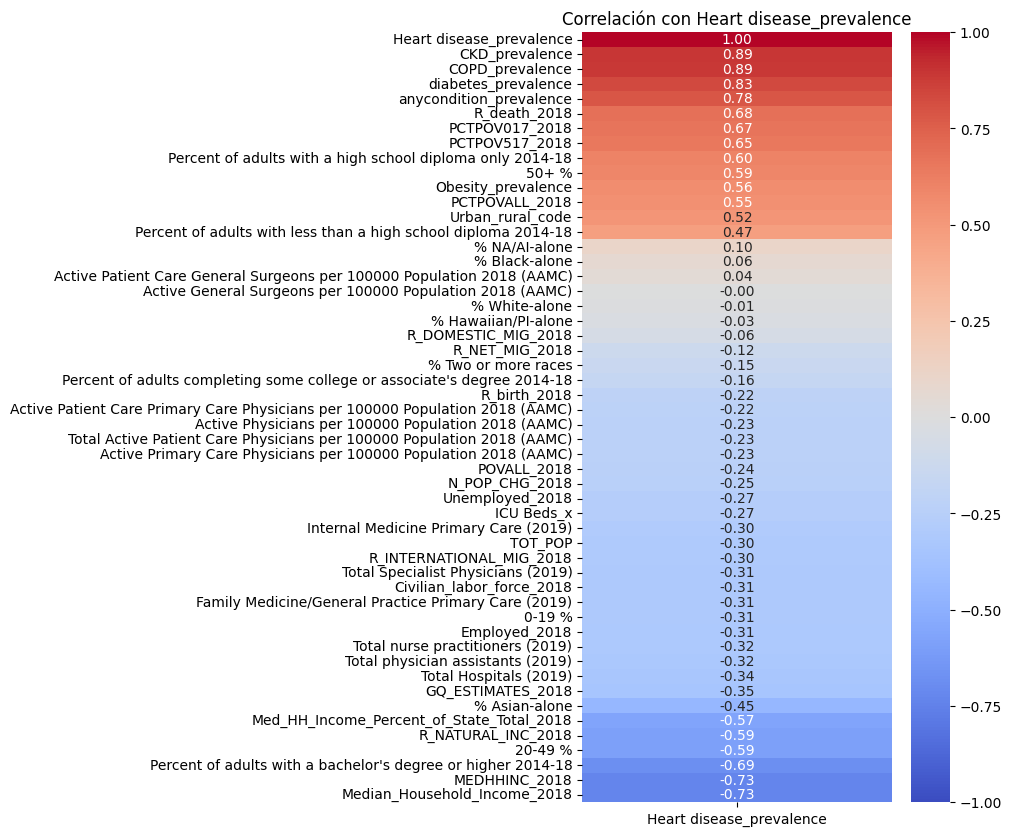

In [ ]:
# Buscar correlaciones bajas (-0.3<x<0.3) con la variable objetivo "Heart disease_prevalence" para eliminar columnas innecesarias

# Calcula todas las correlaciones numéricas
correlaciones = data.corr(numeric_only=True)

# Extrae solo la fila/columna relacionada con tu variable objetivo
cor_target = correlaciones[['Heart disease_prevalence']].sort_values(by='Heart disease_prevalence', ascending=False)

# Pinta el heatmap de una sola columna
plt.figure(figsize=(5, 10))
sns.heatmap(cor_target, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlación con Heart disease_prevalence")
plt.show()

In [37]:
# Se decide eliminar entonces esta lista de columnas
cols_to_drop = ["ICU Beds_x", "Unemployed_2018", "N_POP_CHG_2018", "POVALL_2018", 
                "Active Primary Care Physicians per 100000 Population 2018 (AAMC)", 
                "Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)", 
                "Active Physicians per 100000 Population 2018 (AAMC)", 
                "Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)", "R_birth_2018", 
                "Percent of adults completing some college or associate's degree 2014-18", "% Two or more races", "R_NET_MIG_2018", 
                "R_DOMESTIC_MIG_2018", "% Hawaiian/PI-alone", "% White-alone", "Active General Surgeons per 100000 Population 2018 (AAMC)", 
                "Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)", "% Black-alone", "% NA/AI-alone"]
data = data.drop(columns=cols_to_drop)
data

,TOT_POP,% Asian-alone,GQ_ESTIMATES_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,PCTPOVALL_2018,...,anycondition_prevalence,Obesity_prevalence,Heart disease_prevalence,COPD_prevalence,diabetes_prevalence,CKD_prevalence,Urban_rural_code,0-19 %,20-49 %,50+ %
0,55601,1.224798,455,9.6,2.2,0.0,11.3,32.6,27.7,13.8,...,47.6,35.8,7.9,8.6,12.9,3.1,3,25.941979,38.756497,35.301523
1,218022,1.150343,2190,10.3,0.1,0.5,9.7,27.6,31.3,9.8,...,40.2,29.7,7.8,8.6,12.0,3.2,4,23.699443,34.918494,41.382062
2,24881,0.454162,2820,12.9,-2.5,0.5,27.0,35.7,12.2,30.9,...,57.5,40.7,11.0,12.1,19.7,4.5,6,22.876894,38.354568,38.768538
3,22400,0.236607,2151,11.4,-0.3,0.4,16.8,47.3,11.5,21.8,...,51.6,38.7,8.6,10.0,14.1,3.3,2,22.553571,40.982143,36.464286
4,57840,0.319848,489,11.4,0.3,0.1,19.8,34.0,12.6,13.2,...,46.3,34.0,9.2,10.5,13.5,3.4,2,25.354426,36.479945,38.165629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,43051,1.010429,660,7.0,5.6,1.4,9.0,33.3,22.0,8.4,...,40.3,33.6,5.9,6.6,8.9,2.6,5,28.872732,40.115212,31.012055
3136,23081,1.412417,270,3.2,6.7,1.6,5.6,13.2,57.4,6.3,...,24.3,19.4,5.2,4.9,7.2,2.4,5,19.795503,45.418309,34.786188
3137,20299,0.472930,220,7.2,6.3,0.0,7.2,40.1,15.4,10.0,...,42.2,34.2,7.2,8.0,10.4,3.0,5,31.164097,35.691413,33.144490
3138,7885,0.824350,140,10.7,-1.4,-0.6,10.4,30.3,21.5,11.9,...,37.5,28.4,8.2,8.3,11.3,3.4,6,24.996829,31.934052,43.069119
